In [217]:
import re
import pandas as pd
from matplotlib import pyplot
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set()
%matplotlib inline

In [218]:
df = pd.read_csv("P2.csv", delimiter=",").drop(columns="Id")
input_df = df.copy()
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [219]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in numerical_with_nan:
    print(f"{feature}: {round(df[feature].isnull().mean()*100, 3)}% missing value")

LotFrontage: 17.74% missing value
Alley: 93.767% missing value
MasVnrType: 0.548% missing value
MasVnrArea: 0.548% missing value
BsmtQual: 2.534% missing value
BsmtCond: 2.534% missing value
BsmtExposure: 2.603% missing value
BsmtFinType1: 2.534% missing value
BsmtFinType2: 2.603% missing value
FireplaceQu: 47.26% missing value
GarageType: 5.548% missing value
GarageYrBlt: 5.548% missing value
GarageFinish: 5.548% missing value
GarageQual: 5.548% missing value
GarageCond: 5.548% missing value
PoolQC: 99.521% missing value
Fence: 80.753% missing value
MiscFeature: 96.301% missing value


In [220]:
# Deleting columns with many missing data points
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis = 1,inplace=True)
# Drop rows with missing data, to make sure there are no problems for the algorithms
df.dropna(inplace=True)
df.shape

(1338, 74)

#### Split data into test and train set.
#### Also note that some of the columns encode categorical variables,  like street names, and for those to be parsed by our algorithms, we require them to be encoded properly as numbers. 

In [221]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'SalePrice'], df['SalePrice'], test_size=0.25, random_state=42)
X_train = X_train.reset_index(drop=True)
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,160,2280,7,5,1999,1999,360.0,549,0,195,...,0,0,0,1,0,0,0,0,1,0
1,190,11340,4,6,1885,1950,0.0,0,0,777,...,0,0,0,1,0,0,0,0,1,0
2,30,5400,5,6,1921,1968,0.0,0,0,1073,...,0,0,0,1,1,0,0,0,0,0
3,20,9764,5,7,1967,2003,0.0,702,0,192,...,0,0,0,1,0,0,0,0,1,0
4,75,25419,8,4,1918,1990,0.0,1036,184,140,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,60,14054,7,5,2006,2006,0.0,0,0,879,...,0,1,0,0,0,0,0,0,0,1
999,160,2628,7,5,2003,2003,106.0,0,0,764,...,0,0,0,1,0,0,0,0,1,0
1000,20,10994,8,5,2005,2006,366.0,976,0,868,...,0,0,0,0,1,0,0,0,0,0
1001,20,8487,7,5,2004,2004,210.0,20,0,1480,...,0,0,0,1,0,0,0,0,1,0


In [222]:
from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

#### The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

#### Once identified, we can remove the outliers from the training dataset.

In [223]:
# select all rows that are not outliers
mask = yhat != -1
X_train_clean, y_train_clean = X_train[mask], y_train[mask]
X_train_clean.reset_index(drop=True)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,160,2280,7,5,1999,1999,360.0,549,0,195,...,0,0,0,1,0,0,0,0,1,0
1,190,11340,4,6,1885,1950,0.0,0,0,777,...,0,0,0,1,0,0,0,0,1,0
2,30,5400,5,6,1921,1968,0.0,0,0,1073,...,0,0,0,1,1,0,0,0,0,0
3,20,9764,5,7,1967,2003,0.0,702,0,192,...,0,0,0,1,0,0,0,0,1,0
4,60,7795,7,5,2004,2005,0.0,425,0,291,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,60,9965,8,5,2006,2007,340.0,1150,0,316,...,0,1,0,0,0,0,0,0,0,1
898,60,14054,7,5,2006,2006,0.0,0,0,879,...,0,1,0,0,0,0,0,0,0,1
899,160,2628,7,5,2003,2003,106.0,0,0,764,...,0,0,0,1,0,0,0,0,1,0
900,20,10994,8,5,2005,2006,366.0,976,0,868,...,0,0,0,0,1,0,0,0,0,0


In [224]:
outliers = X_train.iloc[901:, :]
outliers # data frame with outliers

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
901,20,8280,6,5,1950,1950,0.0,0,0,932,...,0,0,0,1,0,0,0,0,1,0
902,85,9180,5,7,1983,1983,0.0,747,93,0,...,0,0,0,1,0,0,0,0,1,0
903,20,7100,5,7,1957,1957,0.0,708,0,108,...,0,0,0,1,0,0,0,0,1,0
904,20,8400,5,6,1957,1957,0.0,922,0,392,...,0,0,0,1,0,0,0,0,1,0
905,60,11228,7,5,1993,1993,0.0,50,531,499,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,60,14054,7,5,2006,2006,0.0,0,0,879,...,0,1,0,0,0,0,0,0,0,1
999,160,2628,7,5,2003,2003,106.0,0,0,764,...,0,0,0,1,0,0,0,0,1,0
1000,20,10994,8,5,2005,2006,366.0,976,0,868,...,0,0,0,0,1,0,0,0,0,0
1001,20,8487,7,5,2004,2004,210.0,20,0,1480,...,0,0,0,1,0,0,0,0,1,0


In [225]:
X_train.shape, y_train.shape

((1003, 264), (1003,))

### PCA Decomposition

#### Now, we will be performing principle commponent analysis on the data to reduce its countless dimensions, and also to visualize how each component of the PCA breakdown explains the data. I decided to plot the data in 2d, and add a further dimension by coloring in each datum (representing each house in our dataset) according to how much each house cost. To do this, I had to first encode the prices of these houses into different color categories, which I do below:

In [226]:
def what_bracket(sale_price):
  if sale_price <=100000:
    return "Tier 1"
  elif sale_price <=200000:
    return "Tier 2"
  elif sale_price <=300000:
    return "Tier 3"
  elif sale_price <= 500000:
    return "Tier 4"
  else:
    return "Tier 5"

y_tiers = y_train.apply(what_bracket)

In [227]:
from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

# Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_train, 10)

# Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_test, 10)

# Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), 
                     columns=["Component", "Explained Variance Ratio"])
scree

,Component,Explained Variance Ratio
0,PCA Component 1,0.987550
1,PCA Component 2,0.004443
2,PCA Component 3,0.003192
3,PCA Component 4,0.002593
4,PCA Component 5,0.000909
5,PCA Component 6,0.000402
6,PCA Component 7,0.000242
7,PCA Component 8,0.000190
8,PCA Component 9,0.000181
9,PCA Component 10,0.000134


#### The table above shows us exactly how "important" each principle component is in explaining the data. 

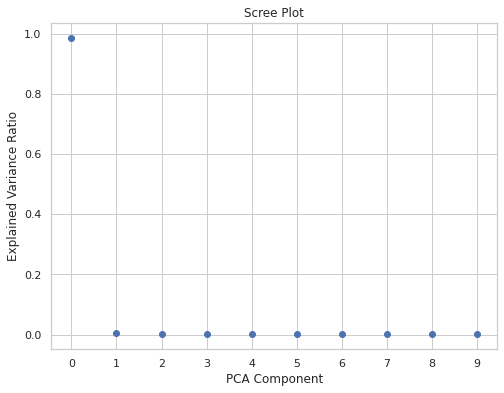

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a scree plot:
xs = np.linspace(0, 9, 10)

sns.set_style("whitegrid")
fig = plt.subplots(figsize=(8,6))
plt.scatter(xs, pca_train.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("PCA Component")
plt.xticks(ticks=xs)
plt.ylabel("Explained Variance Ratio")
plt.show()

#### Now that we know that the first two principle components (and indeed the first principle component alone) explain a huge portion of the variance, we can say that using these two components to represent the data is reasonable. I therefore plot each house datum according to these two components, below:

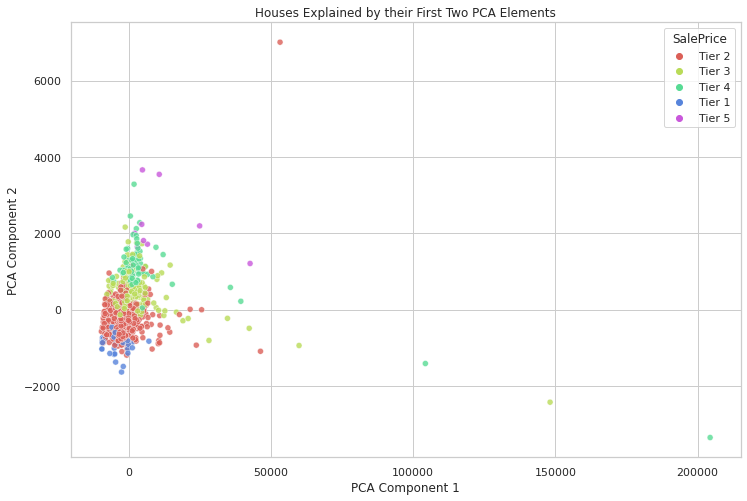

In [229]:
first_comps = pca_train_results[:,0]                       
second_comps = pca_train_results[:,1]

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=first_comps, y=second_comps,
    hue=y_tiers,
    palette=sns.color_palette("hls", 5),
    legend="full",
    alpha=0.8
)

plt.title("Houses Explained by their First Two PCA Elements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#### What is the composition of the first principal component, that seems to be so important? Knowing this can give us insight into the problem of determining the prices of these houses:

In [230]:
# Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)

# Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
important_feature = df2['Variable Names'][0:11].to_frame()
important_feature

,Variable Names
1,LotArea
14,GrLivArea
11,1stFlrSF
10,TotalBsmtSF
7,BsmtFinSF1
25,GarageArea
8,BsmtFinSF2
6,MasVnrArea
12,2ndFlrSF
26,WoodDeckSF


#### The variables printed above are the largest contributors to the first principal components, and thus can be seen as the variables that best explain the variance in the data. Lot Area in particular has a very high influence, at 99.9%.

#### Visualization of most important feature (instead of LotArea as most expensive)

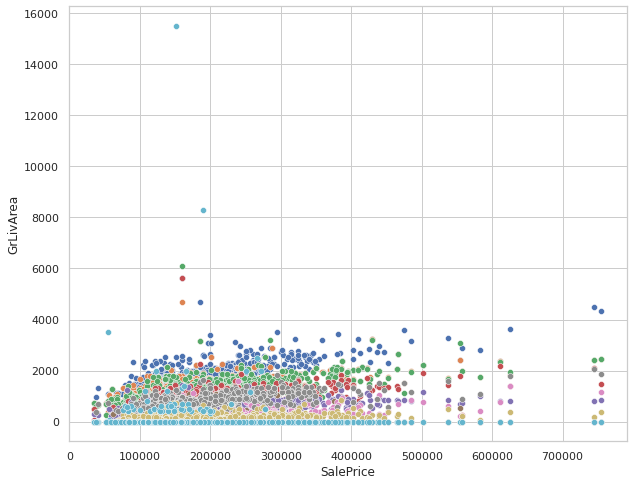

In [231]:
important_feature = important_feature.iloc[1:]
important_feature

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
for var in important_feature["Variable Names"].tolist():
    sns.scatterplot(data=important_feature, x=input_df.SalePrice, y=input_df[var])
    sns.color_palette("hls", 8)
    

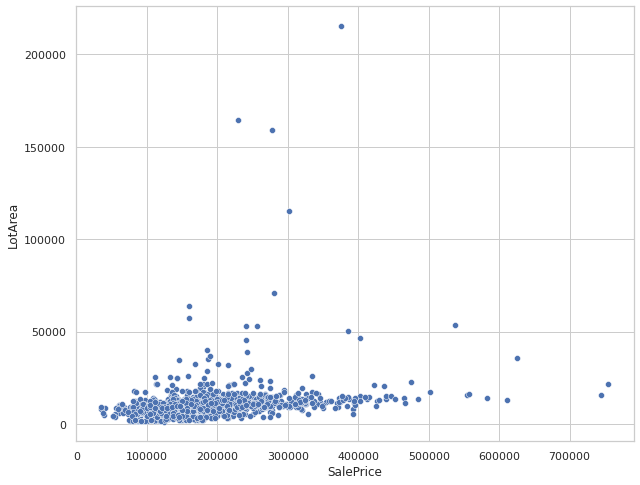

In [232]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.scatterplot(data=important_feature, x=input_df.SalePrice, y=input_df["LotArea"])
sns.color_palette("hls", 8)
plt.show()

### TSNE Decomposition

#### TSNE is another dimensionality reduction technique that reduces a multidimensional datum into only two dimensions. It is more time costly than PCA, but gives us great results, and makes it super easy to visualize the data. I repeat most of the steps I did for PCA in order to produce a graph that shows us how the data is graphed according to TSNE.

In [233]:
from sklearn.manifold import TSNE

# Decomposing the data with TSNE, onto 2 dimensions
tsne_train = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_train_results = tsne_train.fit_transform(X_train)

tsne_test = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_test_results = tsne_test.fit_transform(X_test)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1003 samples in 0.011s...
[t-SNE] Computed neighbors for 1003 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1003
[t-SNE] Computed conditional probabilities for sample 1003 / 1003
[t-SNE] Mean sigma: 364.047795
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.620651
[t-SNE] KL divergence after 500 iterations: 0.567417
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 335 samples in 0.003s...
[t-SNE] Computed neighbors for 335 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 335 / 335
[t-SNE] Mean sigma: 331.109793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.418339
[t-SNE] KL divergence after 500 iterations: 0.368677


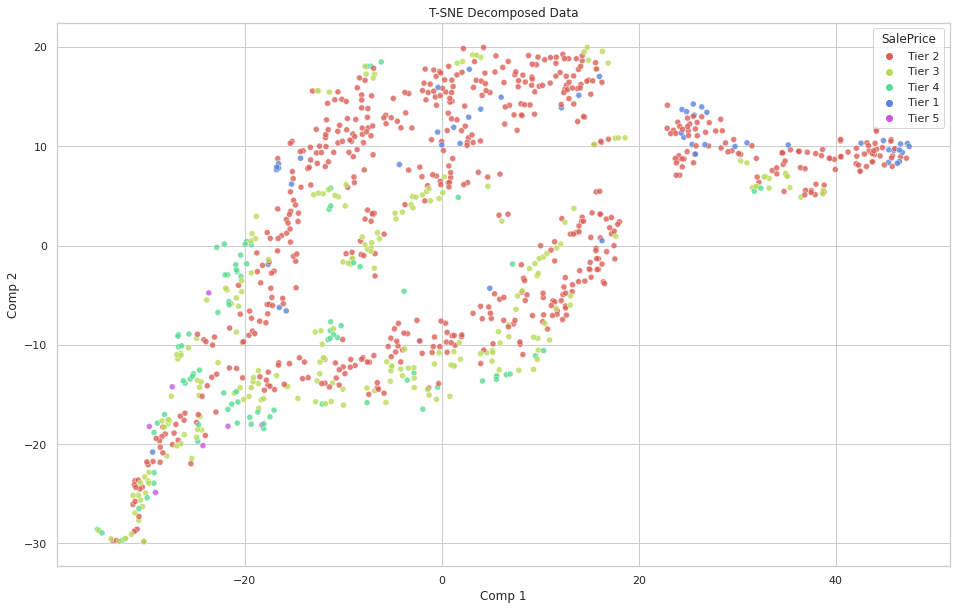

In [234]:
# Plotting the data as explained by the two TSNE components
first_tsne = tsne_train_results[:,0]
second_tsne = tsne_train_results[:,1]

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_tsne, y=second_tsne,
    hue=y_tiers,
    palette=sns.color_palette("hls", 5),
    legend="full",
    alpha=0.8
)
plt.xlabel("Comp 1")
plt.ylabel("Comp 2")
plt.title("T-SNE Decomposed Data")
plt.show()

#### This graph makes it easier to identify each datum, but it doesn't necessarily help us find clusters according to price (color). If we could see clear clusters, that would be good news for prediction algorithms trying to determine how price changes.

### XGBOOST

#### We've now investigated how the data looks after dimensionality reduction, and that in itself has given us insight into the data and what seem to be important explainers of variance, altough not necessarily of price. Now we use XGboost, a state-of-the-art algorithm, to regress the predictor variables against the prices of the houses, thereby predicting how much a house should cost based on these variables.

In [235]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# The xgboost library has a data object that is optimized for this library specifically, and I therefore convert our existing data to the Xgboost-prefered datamatrix format:
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

# I set the hyperparameters of our xgboost algorithm to relatively random variables to start with, based on recommendations within the documentation:
params = {"objective":'reg:squarederror', "colsample_bytree":0.5, "learning_rate":0.2, "max_depth":10, "alpha":20}

xg_m = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=50)

# Now we can test the trained model by first formatting the test data
data_dmatrix_test = xgb.DMatrix(data=X_test)

# And now we predict the prices for the test data
preds = xg_m.predict(data_dmatrix_test)

# How well did we do? A standard measure of performance is the RMSE, the root mean square error, calculated as such:
RMSE = np.sqrt(mean_squared_error(preds, y_test))
print(f"RMSE is {RMSE}")
print(f"Comparing to standard deviation: {np.std(y_train)}")

RMSE is 37011.565391261094
Comparing to standard deviation: 83079.35085062851


#### The standard deviation tells us by how much most data deviate from the mean, and so knowing how wrong we are getting predictions based on that value gives us a sense of how big that error is relative to this dataset.


#### Another way to tell how well we may be doing is to visualize the predictions compared to the real data: the graph below plots the predictions (in blue) and the real values (in red):

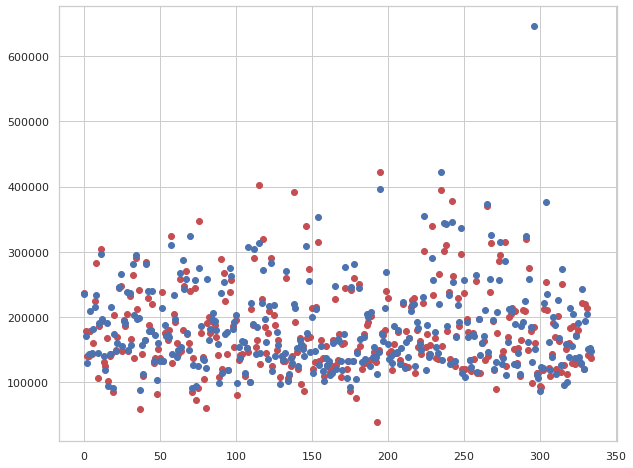

In [236]:
x = range(335)
plt.figure(figsize=(10,8))
plt.plot(x, y_test, "ro")
plt.plot(x, preds, "bo")
plt.show()

#### The model is predicting values with good precision.

### XGBoost Visual: Relative Importance

#### XGBoost is a great algorithm for many reasons: it is accurate, fast, and easy to interpret. This final advantage comes from the fact that XGBoost is building decision trees, which are fairly easy for us to comprehend. The XGBoost library allows us to investigate which factors were most important in our regressions, i.e. what were the best predictors of house prices. I plot that graph for our optimized model below:

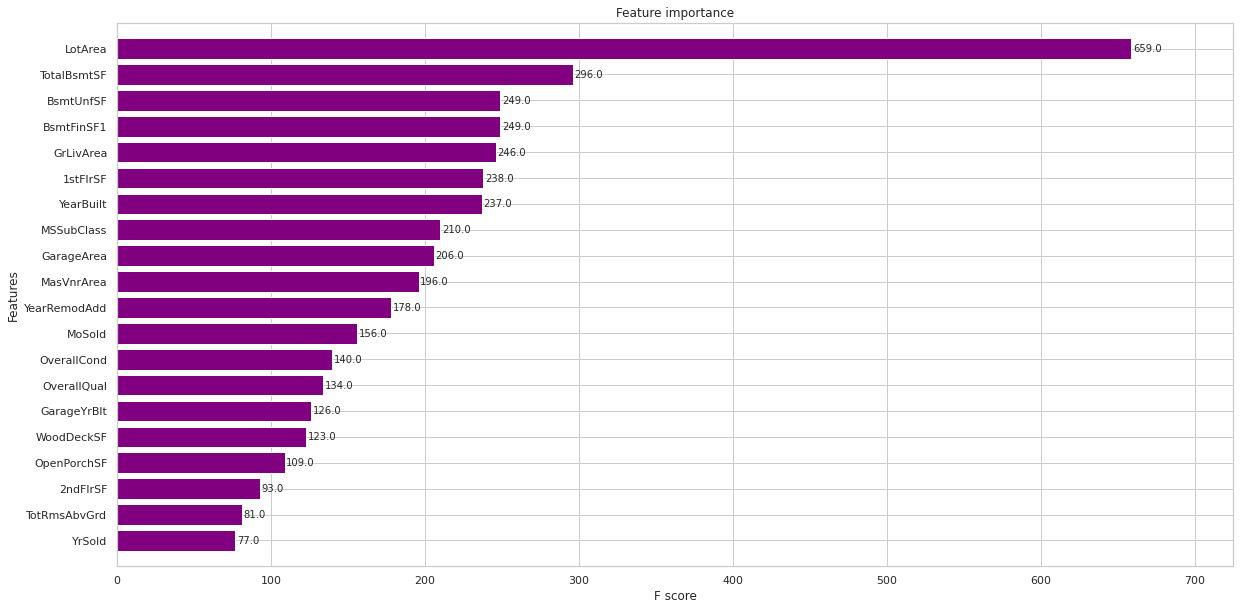

In [237]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (20,10)
xgb.plot_importance(xg_m, max_num_features=20, height=0.8, color="purple")
plt.show()